# How did ___Internet___ affect the ___Fortune 500___??

The aim of this project is to unravel a relationship between internet boom and change in structure of the Fortune 500.

Some of the essential questions for developing this project are related to mean revenue, minimum revenue, maximum revenue, some other statistical measures & their ratios.

#### **Dataset**:
The dataset used in this analysis is on **revenue of Fortune 500 Companies from 1955 to 2021** (taken from Kaggle<sup>[[1]](https://www.kaggle.com/darinhawley/fortune-500-companies-19552021)</sup>). The dataset has the following features:

- **Size**:
 - *No. of rows*: ***33,500***
 - *No. of columns*: ___4___

- **Columns**:
 1. ___Year___
    - "Year" for which the revenue is reported
    - dtype: ***Integer***
 2. ___Name___
    - "Name" of the company
    - dtype: ***String***
 3. ___Revenue___
    - "Revenue" earned by the company in a particular year (in $ million)
    - dtype: ***Float***
 4. ___Rank___
    - "Rank" in the year based on revenue earned
    - dtype: ***Integer***

The following column was later added to the data to help with the analysis.
- ___Is Tech Company___
 - Whether company operates in the technology/internet sector
 - This was added by scraping _"Industry"_ from ***Wikipedia***
 - dtype: ***Bool as Integer (0 or 1)***

#### **Tools used**:
The following tools were used for this analysis:
- [**pandas**](https://pandas.pydata.org/)
- [**numpy**](https://numpy.org/)
- [**matplotlib**](https://matplotlib.org/)
- [**scipy**](https://scipy.org/)

<hr />

#### **Analysis**:

As a first step, we **upload the dataset** (downloaded from Kaggle<sup>[[1]](https://www.kaggle.com/darinhawley/fortune-500-companies-19552021)</sup>) from the local system to this notebook.

In [1]:
import io

from google.colab import files

uploaded = files.upload()

Saving fortune500.csv to fortune500.csv


Next, we need to get the data into a format that's suitable for analysis. For that we'll use the `pandas` library, and load the data into a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

Additionally, to understand how the data is structured we'll use the `head` method to look at the first 5 rows of the data.

In [2]:
import numpy as np
import pandas as pd

revenue_df = pd.read_csv(io.BytesIO(uploaded['fortune500.csv']))

# revenue_df.shape
revenue_df.head()

,Year,Name,Revenue,Rank
0,2021,Walmart,559151,1
1,2021,Amazon,386064,2
2,2021,Apple,274515,3
3,2021,CVS,268706,4
4,2021,UnitedHealth Group,257141,5


Before diving into the analysis, we should look for missing values and **try to clean the data**. After some eye-balling, we can figure out that the sheet doesn't have any `null` values and uses `'-'` to indicate missing values.

So, we check for the missing (or `'-'`) values within the entire dataframe. We'll list all the columns sorted in descending order of missing values.

In [3]:
# np.where(pd.isnull(revenue_df))
revenue_df.eq('-').sum().sort_values(ascending=False)

Revenue    500
Rank         0
Name         0
Year         0
dtype: int64

We find that there's relatively low number of missing values. In fact, only the _`Revenue`_ column has 500 missing values (that's less than 2% of total number of rows -- so not that big of an issue).

But, we also don't want the missing values to affect the analysis. So, **we replace them with** _`NaN`_ **to ensure they don't interfere with the numerical analyses**.

Also, we can comprehend that the _`Rank`_ column will not be of much help in the analysis. So, we can drop it from the dataframe.

In [4]:
cleaned_revenue_df = revenue_df.drop(['Rank'], axis=1)
cleaned_revenue_df = cleaned_revenue_df.replace('-', np.nan).astype({'Revenue': float})
cleaned_revenue_df.describe()

,Year,Revenue
count,33500.000000,33000.000000
mean,1988.000000,8617.087591
std,19.339368,22508.837739
min,1955.000000,49.700000
25%,1971.000000,511.300000
50%,1988.000000,2324.250000
75%,2005.000000,7954.175000
max,2021.000000,559151.000000


The data in its current format has yearly revenue for each company as a discrete row. **This format is extensive, and not ideal for our analysis**.

So, we'll **create a pivot table to get data summarized by companies**. The data in this format will be better suited for our analysis.

In [5]:
modified_revenue_df = cleaned_revenue_df.pivot_table(values='Revenue', index='Name', columns=['Year'])
modified_revenue_df

Year,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3Com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617.2,NaN,NaN,NaN,3147.1,5420.4,5772.1,5391.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3M,230.9,281.9,330.8,370.1,376.3,500.7,549.7,608.2,687.1,761.8,903.9,1000.3,1152.6,1231.1,1405.0,1612.6,1687.3,1829.2,2114.1,2545.6,2937.0,3127.3,3514.3,3980.3,4661.7,5440.4,6079.5,6508.0,6601.0,7039.0,7705.0,7846.0,8602.0,9429.0,10581.0,11990.0,13021.0,13340.0,13883.0,14020.0,15079.0,16105.0,14236.0,15070.0,15021.0,15659.0,16724.0,16079.0,16332.0,18232.0,20011.0,21167.0,22923.0,24462.0,25269.0,23123.0,26662.0,29611.0,29904.0,30871.0,30274.0,30109.0,31657.0,32765.0,32136.0,32184.0
A-Mark Precious Metals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6070.0,6784.0,6989.6,7606.2,NaN,5461.1
A-T-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.3,325.2,378.9,356.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A. Schulman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,598.0,626.2,681.1,740.1,738.9,693.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimmer Biomet Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5998.0,7684.0,7824.1,7932.9,7982.2,7024.5
Zoetis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5825.0,6260.0,6675.0
Zurn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,610.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After getting the company-wise data, we can do **some initial exploratory analysis**. For that, we'll use the `describe` method to uncover some statistical insights.

In [6]:
revenue_stats_df = modified_revenue_df.describe()
revenue_stats_df

Year,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021
count,500.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,499.000000,499.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,499.000000,499.000000,499.000000,498.000000,500.000000
mean,273.566000,322.851804,348.627555,376.621343,353.573447,394.685471,409.325551,418.159719,457.847695,489.604409,532.361723,595.359118,664.196693,716.286874,810.546400,889.436400,927.855800,1005.797200,1115.293000,1334.211200,1666.178000,1730.469600,1942.27580,2173.197400,2437.392800,2890.625000,3300.440600,3546.713400,3344.439000,3373.394600,3517.309600,3614.136400,3447.278000,3759.000000,4053.276553,4329.713000,4606.544400,4527.851000,4730.997000,4740.328600,8534.937400,9384.185371,10159.746794,11043.673647,11476.205800,12649.921600,14361.759400,14840.652400,13911.422600,14930.537000,16495.951200,18176.03860,19789.009400,21198.175000,21369.742400,19526.957800,21561.93120,23500.512000,24124.855200,24421.006000,23990.060000,24061.510020,25599.223447,27408.111623,28339.454016,27526.153400
std,610.669266,774.408213,748.289025,806.831017,715.229204,799.073695,851.315122,841.952141,991.254418,1084.445657,1147.456748,1334.447309,1377.278384,1408.375250,1613.876939,1710.144054,1640.547322,1991.521337,2213.213058,2648.276283,3357.340144,3553.196748,4152.84562,4771.597378,5326.667425,6324.113826,7438.729167,8027.097588,7485.588583,7454.905454,8007.936341,8326.144099,7882.872718,8404.359307,9477.923720,10122.316398,10896.613958,10582.877508,11101.915103,11072.720434,13306.340817,14280.868297,15086.016038,15832.584249,15687.180308,18547.014715,21555.492009,22281.143254,21706.701828,23388.162038,26465.989857,30321.17014,32730.646543,34849.031464,37216.464477,32038.340474,35697.08278,39869.985949,40255.198234,39783.405322,37988.461277,38359.300601,40636.717350,43964.858462,45911.158620,47570.756831
min,49.700000,55.100000,61.100000,64.700000,61.700000,71.800000,72.400000,76.100000,83.300000,86.000000,97.100000,109.600000,128.900000,131.300000,143.700000,161.900000,165.800000,176.100000,203.800000,242.700000,286.000000,297.200000,327.70000,355.200000,379.900000,409.700000,447.700000,454.500000,423.700000,418.300000,416.400000,424.200000,420.200000,459.000000,501.000000,543.100000,546.300000,528.800000,585.300000,614.300000,2204.600000,2429.700000,2577.800000,2721.000000,2896.400000,3037.300000,3196.800000,3042.500000,2948.300000,3214.100000,3614.000000,3959.60000,4265.500000,4618.000000,4608.000000,4161.800000,4373.20000,4769.900000,4820.800000,4955.000000,5130.000000,5145.000000,5428.900000,5575.400000,5655.000000,5371.000000
25%,71.600000,79.350000,88.700000,95.400000,89.700000,104.450000,106.500000,108.600000,119.300000,126.750000,139.450000,158.750000,180.550000,190.600000,218.200000,243.825000,261.300000,283.000000,318.600000,372.975000,446.225000,451.175000,493.62500,532.875000,584.925000,650.225000,727.925000,752.525000,685.825000,694.500000,712.875000,728.550000,736.075000,761.750000,783.000000,854.075000,868.700000,843.675000,919.525000,919.075000,2989.550000,3308.650000,3599.550000,3907.750000,4120.450000,4235.075000,4550.275000,4377.550000,4340.775000,4666.400000,5251.575000,5739.300

Let's try to **visualize** some of this data and see what insights come to light.

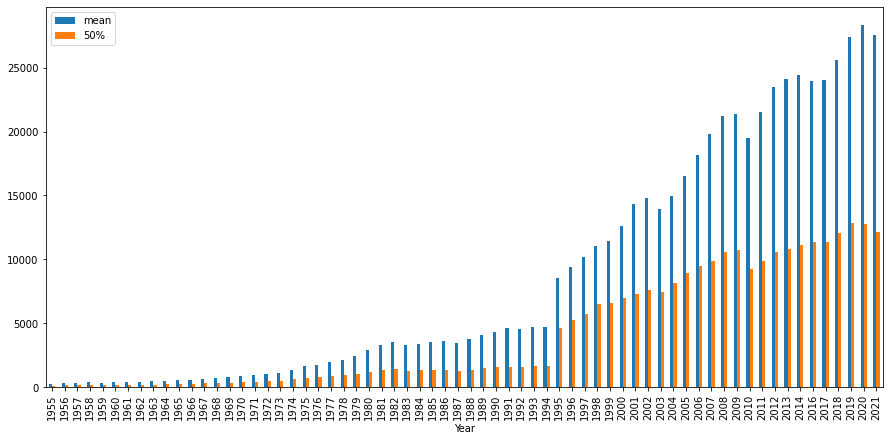

In [7]:
revenue_stats_df.T.plot.bar(y=['mean', '50%'], figsize=(15,7))

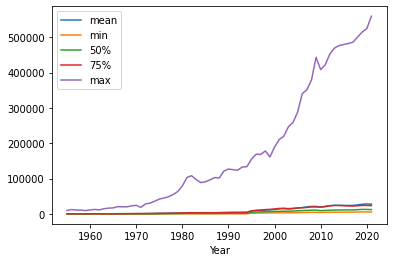

In [8]:
revenue_stats_df.T.plot.line(y=['mean', 'min', '50%', '75%', 'max'])

The **first plot illustrates that the** _`mean`_ **and** _`median`_ **have a pretty significant difference**.

The **second plot shows that the** _`max`_ **value is considerably higher than the other statistics**.

Both these observations suggest that the **data is skewed**. Furthermore, the second plot also helps us in inferring that the **variance in data in the first 3 quartiles (0 to 75%) is much lesser than that in the complete dataset**. In other words, there are high value outliers in the top (or, fourth) quartile.

Let's try to analyze the trends amognst some of these statistics further in-depth



'gradient'

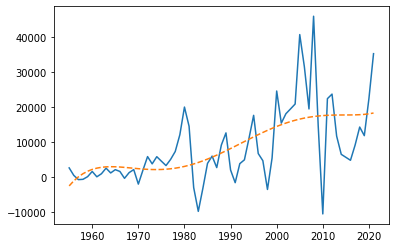

In [16]:
from matplotlib import pyplot

# np.gradient(revenue_stats_df.loc['max'])
max_stat_gradient = np.gradient(revenue_stats_df.loc['max']) 

# using degree 5 polynomial as it seems to best fit our data -- figured out by plotting different polynomials
max_stat_trend_polynomial = np.polyfit(revenue_stats_df.columns, max_stat_gradient, 5)

max_plot_list = pyplot.plot(revenue_stats_df.columns, np.gradient(revenue_stats_df.loc['max']), revenue_stats_df.columns, np.poly1d(max_stat_trend_polynomial)(revenue_stats_df.columns), '--')

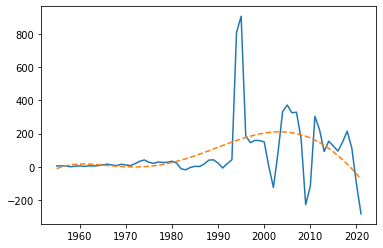

In [17]:
# np.gradient(revenue_stats_df.loc['min'])
min_stat_gradient = np.gradient(revenue_stats_df.loc['min'])
min_stat_trend_polynomial = np.polyfit(revenue_stats_df.columns, min_stat_gradient, 5)

pyplot.plot(revenue_stats_df.columns, np.gradient(revenue_stats_df.loc['min']), revenue_stats_df.columns, np.poly1d(min_stat_trend_polynomial)(revenue_stats_df.columns), '--')

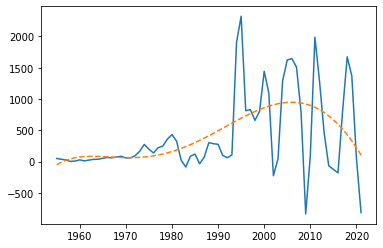

In [19]:
# np.gradient(revenue_stats_df.loc['mean'])
mean_stat_gradient = np.gradient(revenue_stats_df.loc['mean'])
mean_stat_trend_polynomial = np.polyfit(revenue_stats_df.columns, mean_stat_gradient, 5)

pyplot.plot(revenue_stats_df.columns, np.gradient(revenue_stats_df.loc['mean']), revenue_stats_df.columns, np.poly1d(mean_stat_trend_polynomial)(revenue_stats_df.columns), '--')

From the above plots, it's clear that **the** _`max`_ **revenue has been on an upward trend overall**; but the gradient has become steeper around the 1990s.

Other stats like _`min`_ **and** _`mean`_ **started increasing sharply around the early 1990s** but started to go on a **downward trend sometime around the 2008 market crash**!

But, since we previously determined that there's discrepancy amongst the lower 3 quartiles and the top quartile, it may be useful to analyze some additional ratios between these statistics.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78b818a50>,
      dtype=object)

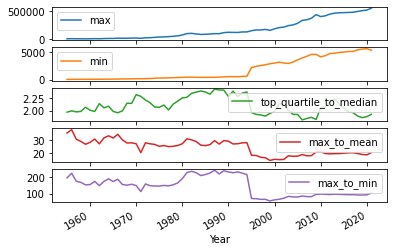

In [20]:
revenue_stats_df.loc['max_to_min'] = (revenue_stats_df.loc['max'] / revenue_stats_df.loc['min'])
revenue_stats_df.loc['max_to_median'] = (revenue_stats_df.loc['max'] / revenue_stats_df.loc['50%'])
revenue_stats_df.loc['max_to_mean'] = (revenue_stats_df.loc['max'] / revenue_stats_df.loc['mean'])
revenue_stats_df.loc['top_quartile_to_median'] = (revenue_stats_df.loc['75%'] / revenue_stats_df.loc['50%'])

revenue_stats_df.T.plot.line(y=['max', 'min', 'top_quartile_to_median', 'max_to_mean', 'max_to_min'], subplots=True)

The above plots clearly illustrate that there's been **a shift in trends around the mid 1990s**. Most notable of these shifts is the **drop in the** _`max_to_min`_ **revenue ratio**; **it dropped by around half**.

#### ***`Mid 1990s was the time when the "Internet" was booming and "Technology" companies were on the rise. So, it'll be interesting to analyze how internet/tech-based companies have affected this shift in revenue and the overall composition of the Fortune 500.`***
<hr />

For purpose of our analysis, we need a way to **differentiate between _"tech"_ and _"non-tech"_ companies**.

So, we'll try to figure out which of the companies in our list are tech-based (and which are not) by scraping [_`Wikipedia`_](https://www.wikipedia.org/) to fetch thier _"Industry"_ sector. We'll compare the _"Industry"_ with a regex and determine which of the companies are internet/tech-based.

In [21]:
from bs4 import BeautifulSoup
from concurrent import futures

import re
import requests

def is_tech_company(company_name):
  response = requests.get(
    url="https://en.wikipedia.org/wiki/{0}".format(company_name),
  )

  if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    ele = soup('th', text=re.compile('Industry.*'))
    ele = ele[0].find_next_sibling("td")
    # ele.text
    tech_keyword_found = re.search('computer|tech|software|internet', ele.text, re.I)
    return tech_keyword_found != None

  return False

def update_if_is_tech(company_name):
  is_tech = is_tech_company(company_name)
  if is_tech == True:
    modified_revenue_df['is_tech_company'][company_name] = 1

modified_revenue_df['is_tech_company'] = 0
company_list = revenue_df['Name'].unique()
with futures.ThreadPoolExecutor(max_workers=25) as executor:
    executor.map(update_if_is_tech, company_list)

modified_revenue_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Year,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021,is_tech_company
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3Com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617.2,NaN,NaN,NaN,3147.1,5420.4,5772.1,5391.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3M,230.9,281.9,330.8,370.1,376.3,500.7,549.7,608.2,687.1,761.8,903.9,1000.3,1152.6,1231.1,1405.0,1612.6,1687.3,1829.2,2114.1,2545.6,2937.0,3127.3,3514.3,3980.3,4661.7,5440.4,6079.5,6508.0,6601.0,7039.0,7705.0,7846.0,8602.0,9429.0,10581.0,11990.0,13021.0,13340.0,13883.0,14020.0,15079.0,16105.0,14236.0,15070.0,15021.0,15659.0,16724.0,16079.0,16332.0,18232.0,20011.0,21167.0,22923.0,24462.0,25269.0,23123.0,26662.0,29611.0,29904.0,30871.0,30274.0,30109.0,31657.0,32765.0,32136.0,32184.0,0
A-Mark Precious Metals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6070.0,6784.0,6989.6,7606.2,NaN,5461.1,0
A-T-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.3,325.2,378.9,356.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
A. Schulman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,598.0,626.2,681.1,740.1,738.9,693.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<hr />

Now that we have all the data that's needed, we can try to **formulate the hypotheses which will help us understand whether or not the Internet affected the Fortune 500**.

>***Note***: *For the purpose of this analysis, we'll use **1995 as the year to split up the data to understand the effects of Internet**.*

- We can first try to analyze the change in spread of revenue earned by the Fortune 500 companies before and after 1995, other things remaining constant. For this, the _**null hypothesis states that there’s not much change in mean max-min ratio of revenue earned by companies before 1995** (group 1) **and after 1995** (group 2) **at 95% Confidence Interval**_.
```
                                  H0: µ1 - µ2 = 0
                                  Ha: µ1 - µ2 ≠ 0 (where, Ha is the alternate hypothesis)
                               &, α = 0.05 (at 95% C.I)
```



- And next, we can try to understand the contribution of internet boom to change of composition of Fortune 500 after 1995. In this case, the _**null hypothesis can be formulated to state that there’s no significant change in mean revenue of group A** (all 500 companies) **& group B** (all companies except tech based) **at 95 % Confidence Interval**_.
```
                                  H0: µA - µB = 0
                                  Ha: µA - µB ≠ 0 (where, Ha is the alternate hypothesis)
                               &, α = 0.05 (at 95% C.I)
```

<hr />

Now, let's move try to **test our proposed hypotheses**.

So, for the **first hypothesis** - which states that ***there’s not much change in mean max-min ratio of revenue earned by companies before 1995 and after 1995*** - we'll need to split our data into ***2 groups; one comprising of revenue data before 1995 and the other with data after 1995***. We can directly use the `revenue_stats_df` dataframe to get these 2 groups.

In [22]:
group_before_95 = revenue_stats_df.iloc[:, 0:40]

group_after_95 = revenue_stats_df.iloc[:, 40:]

# group_before_95
print(group_before_95.loc['max_to_min'].mean())
# group_after_95
print(group_after_95.loc['max_to_min'].mean())

187.27873114005223
83.43329952381939


There's a **big difference between the mean values of max:min revenue ratio for both the groups** - this supports our hypothesis but isn't enough to either reject or fail to reject the null hypothesis.

To draw firm statistical inference for either accepting or rejecting the hypothesis, we can use the **2 sample t-test** to compare the 2 groups

In [23]:
from scipy import stats

# perform a standard 2 sample t-test
stats.ttest_ind(a=group_before_95.loc['max_to_min'], b=group_after_95.loc['max_to_min'], equal_var=True)

Ttest_indResult(statistic=14.004220411083283, pvalue=3.703853938384262e-21)

Since, the **`t-statistic(=16.4802) > critical value(=1.96)`**,we **can reject the null hypothesis that there's no difference between max:min revenue ratio** of the two groups. And since the **`p-value(=1.0545e-22) < 0.05`**, we can say that the difference is **statistically significant at 95% confidence interval**. 

But, since the sample size for our 2 groups isn't equal, we might want to use **Welch's t-test** which is more reliable when the **two samples have unequal variances and/or unequal sample sizes**.

In [24]:
# perform Welch’s t-test
stats.ttest_ind(a=group_before_95.loc['max_to_min'], b=group_after_95.loc['max_to_min'], equal_var=False)

Ttest_indResult(statistic=16.480179038244305, pvalue=1.0544839994112443e-22)

Again, we can see that the **`t-statistic(=16.4802) > critical value(=1.96)`**, so we **can safely reject the null hypothesis that there's no difference between *`max:min`* revenue ratio** of the two groups. Also, since the **`p-value(=1.0545e-22) < 0.05`**, we can say that the difference is **statistically significant at 95% confidence interval**.

Thus, these tests clearly show that there has been a ***significant change in the mean `max:min` revenue ratios of Fortune 500 companies before & after 1995***. 

<hr />

Now, moving on to the **second hypothesis** - which states that **there’s no significant change in mean revenue of *`all`* companies in Fortune 500 & all *`non-tech`* companies in Fortune 500** at 95 % Confidence Interval. For this, we'll split our data into ***2 groups; one comprising of revenue data of all 500 compaies after 1995 and the other with data pertaining to all non tech-companies after 1995***.

Firstly, let's get the revenue data after 1995 into a separate `revenue_after_95_df` dataframe - we'll use this dataframe to form our 2 groups for further analysis.

In [25]:
revenue_after_95_df = modified_revenue_df.iloc[:, 40:]
revenue_after_95_df.head()

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021,is_tech_company
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,
3Com,NaN,NaN,NaN,3147.1,5420.4,5772.1,5391.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3M,15079.0,16105.0,14236.0,15070.0,15021.0,15659.0,16724.0,16079.0,16332.0,18232.0,20011.0,21167.0,22923.0,24462.0,25269.0,23123.0,26662.0,29611.0,29904.0,30871.0,30274.0,30109.0,31657.0,32765.0,32136.0,32184.0,0
A-Mark Precious Metals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6070.0,6784.0,6989.6,7606.2,NaN,5461.1,0
A-T-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
A. Schulman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


We can split our data using the values in the _`is_tech_company`_ column, but that column itself isn't required for the analysis. So, we'll drop it from the resultant dataframes (i.e. `revenue_tech_after_95` and `revenue_non_tech_after_95` in our case)

In [26]:
revenue_tech_after_95 = revenue_after_95_df[revenue_after_95_df['is_tech_company'] == 1]
revenue_tech_after_95 = revenue_tech_after_95.drop(['is_tech_company'], axis=1)

# drop rows where all values are missing/null values
revenue_tech_after_95 = revenue_tech_after_95.dropna(how='all')

# len(revenue_tech_after_95)
revenue_tech_after_95.head()

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021
Name,,,,,,,,,,,,,,,,,,,,,,,,,,
3Com,NaN,NaN,NaN,3147.1,5420.4,5772.1,5391.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT&T,75094.0,79609.0,74525.0,53261.0,53588.0,62391.0,65981.0,59142.0,46727.0,34529.0,30537.0,43862.0,63055.0,118928.0,124028.0,123018.0,124629.0,126723.0,127434.0,128752.0,146801.0,163786.0,160546.0,170756.0,181193.0,171760.0
Affiliated Computer Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3062.9,3787.2,4106.4,4351.2,5353.7,5772.5,6160.6,6523.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amgen,NaN,NaN,NaN,NaN,NaN,3340.1,3629.4,4015.7,5523.0,8356.0,10550.0,12430.0,14268.0,14771.0,15003.0,14642.0,15053.0,15582.0,17265.0,18676.0,21662.0,22991.0,22849.0,23747.0,23362.0,25424.0
Avantor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040.3,6393.6


In [27]:
revenue_non_tech_after_95 = revenue_after_95_df[revenue_after_95_df['is_tech_company'] != 1]
revenue_non_tech_after_95 = revenue_non_tech_after_95.drop(['is_tech_company'], axis=1)

# drop rows where all values are missing/null values
revenue_non_tech_after_95 = revenue_non_tech_after_95.dropna(how='all')

# len(revenue_non_tech_after_95)
revenue_non_tech_after_95.head()

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021
Name,,,,,,,,,,,,,,,,,,,,,,,,,,
3M,15079.0,16105.0,14236.0,15070.0,15021.0,15659.0,16724.0,16079.0,16332.0,18232.0,20011.0,21167.0,22923.0,24462.0,25269.0,23123.0,26662.0,29611.0,29904.0,30871.0,30274.0,30109.0,31657.0,32765.0,32136.0,32184.0
A-Mark Precious Metals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6070.0,6784.0,6989.6,7606.2,NaN,5461.1
ABM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5291.0,5145.0,5453.6,6442.2,6498.6,5987.6
ADC Telecommunications,NaN,NaN,NaN,NaN,NaN,NaN,3287.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADP,2469.0,2893.7,3566.6,4112.2,4798.1,5540.1,6287.5,7017.6,7004.3,7147.0,7754.9,8499.1,9263.2,9318.7,8776.5,8867.1,8944.9,9879.5,10665.2,11334.0,11477.0,11668.0,12379.8,13325.8,14175.2,14589.8


Now, we can run **t-test** for the mean revenue from the `group_after_95` dataframe (from the previous test) and the mean of the newly computed `revenue_non_tech_after_95` dataframe.

In [28]:
# perform a standard 2 sample t-test
stats.ttest_ind(a=group_after_95.loc['mean'], b=revenue_non_tech_after_95.mean(), equal_var=True)

Ttest_indResult(statistic=0.3113165622303512, pvalue=0.7568543042517342)

The above case shows that we **fail to reject the null hypothesis**, since the **`t-statistic(=0.3113) < critical value(=1.96)`** at **95% C.I. level**. Also, the **`p-value(=0.7568) > 0.05`**, the results are **statistically insignificant**.

In [43]:
a = len(revenue_tech_after_95)
b = len(revenue_non_tech_after_95)

print('Number of Non-tech companies in the list:\t', b)
print('Number of Tech companies in the list:\t\t', a)
print('%-age Tech companies:\t\t\t\t', (a / (a + b) * 100))

Number of Non-tech companies in the list:	 1207
Number of Tech companies in the list:		 55
%-age Tech companies:				 4.3581616481774965


One possible reason for this could be the ***relatively small share (<5%) of tech-based companies*** (resulting in the list of non-tech companies being almost identical to the entire list of companies).

So, instead of comparing all companies to non-tech companies let's try to ***compare all companies to tech companies***.

In [44]:
# perform a standard 2 sample t-test

Ttest_indResult(statistic=-5.6135600142037045, pvalue=8.668850679901401e-07)

In [69]:
print('Mean revenue for all companies: $', group_after_95.loc['mean'].mean(), '(mill.)')
print('Mean revenue for non-tech companies: $', revenue_non_tech_after_95.mean().mean(), '(mill.)')
print('Mean revenue for tech companies: $', revenue_tech_after_95.mean().mean(), '(mill.)')

Mean revenue for all companies: $ 18783.912819917998 (mill.)
Mean revenue for non-tech companies: $ 18257.212124034526 (mill.)
Mean revenue for tech companies: $ 29743.280286668374 (mill.)


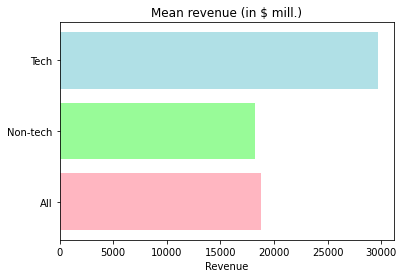

In [68]:
from matplotlib import pyplot

pyplot.barh(['All', 'Non-tech', 'Tech'], [group_after_95.loc['mean'].mean(), revenue_non_tech_after_95.mean().mean(), revenue_tech_after_95.mean().mean()], color=['lightpink', 'palegreen', 'powderblue'])
pyplot.title('Mean revenue (in $ mill.)')
pyplot.xlabel('Revenue')
pyplot.show()

It can be inferred from these test results that the ***mean revenue of `tech` companies is not equal to `all` Fortune 500 companies***. Also, **`p-value(=8.6689e-07)`** implies the results are **statistically significant**.

And, based on the mean values, it's safe to conclude that ***mean revenue for `tech` companies is far greater than that of `non-tech` companies*** (and the mean of all companies as well).

<hr />

### **Inferences & Conclusions:**

 1. There's been significant fall in the difference of maximum revenue and minimum revenue around mid 1990s. 

 2. There was great disparity in revenue between the first three quartiles (0-75%) & last quartile (75-100%) of the Fortune 500 companies before 1995.

 3. The shift in the structure coincides with the Internet boom, i.e around mid 1990s.

 4. Larger share of tech companies entered the Fortune 500 during and/or after the 1990s

 5. Revenue of tech companies is significantly higher, but they haven't been able to influence the Fortune 500 composition much because their share hasn't increased very much. 